原始维度: (1, 32, 256, 256)
处理后的维度: (32, 256, 256)


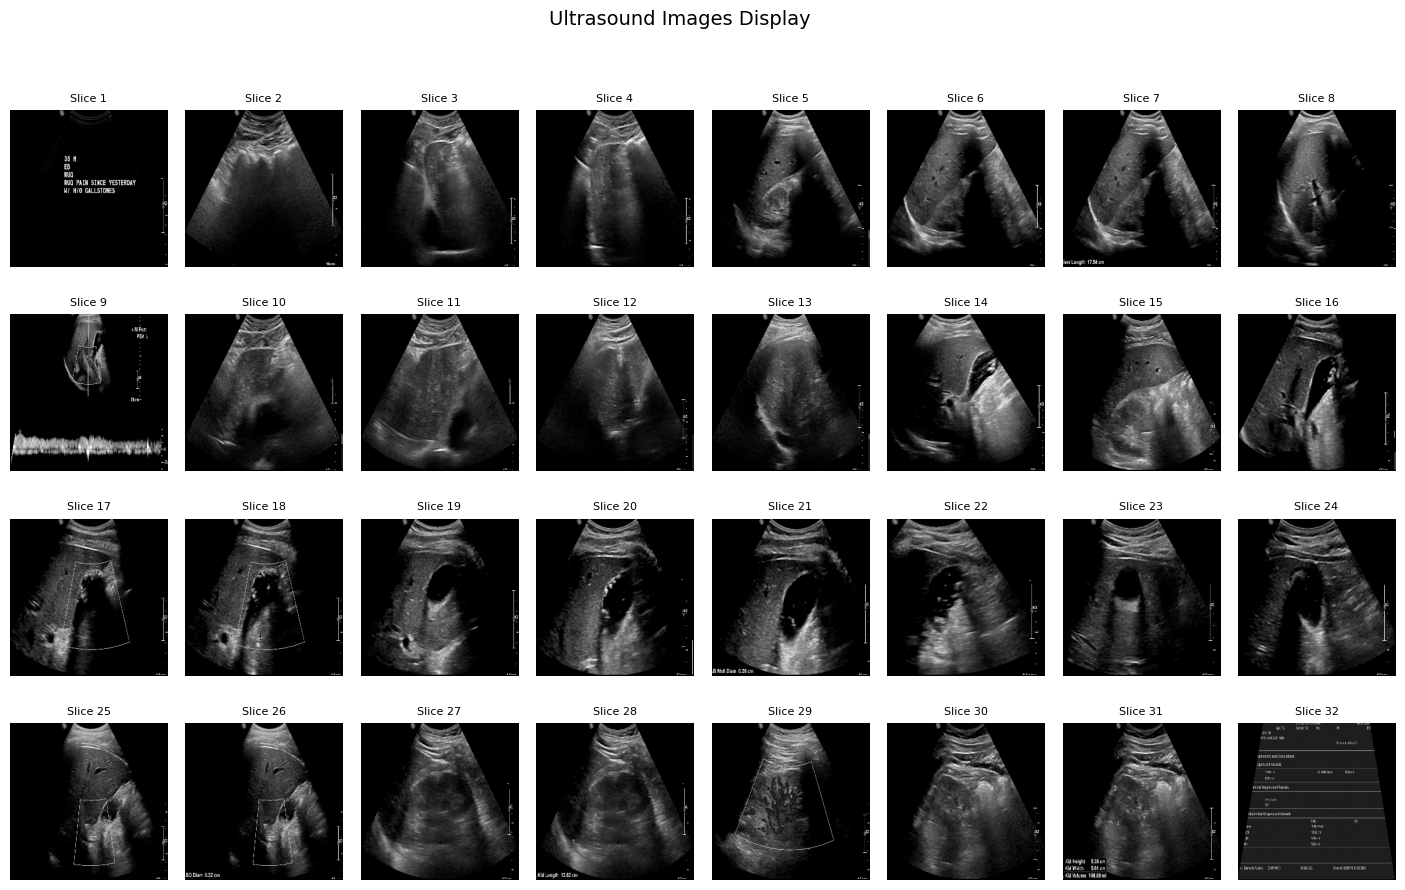

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 加载数据
data = np.load('C:\\Users\\alexvanhalen\\OneDrive\\Desktop\\PE_CTPA_survey\\PE_CTPA_survey\\survey_app\\npy_image_convertion\\test_samples\\test_samples\\2a2f462e_20211028\\img.npy')

print("原始维度:", data.shape)  # 应显示 (1, 32, 256, 256)

# 数据预处理
data = data.squeeze()  # 去除批次维度 -> (32, 256, 256)
print("处理后的维度:", data.shape)  # 应显示 (32, 256, 256)

# 显示设置
fig, axes = plt.subplots(4, 8, figsize=(18, 10))

# 遍历子图绘制
for idx in range(32):
    row = idx // 8
    col = idx % 8
    
    # 显示超声图像（假设数据已标准化到0-1范围）
    axes[row, col].imshow(data[idx], 
                         cmap='gray',  # 使用灰度映射
                         vmin=0,       # 最小像素值
                         vmax=1)       # 最大像素值（根据实际数据可能需要调整）

    # 隐藏坐标轴
    axes[row, col].set_title(f"Slice {idx+1}", fontsize=8)
    axes[row, col].axis('off')

# 优化布局和显示
plt.subplots_adjust(wspace=0.05, hspace=0.3)  # 调整子图间距
plt.suptitle("Ultrasound Images Display", y=0.98, fontsize=14)
plt.show()


In [8]:
# import os
# import glob
# import numpy as np
# import matplotlib.pyplot as plt

# # Define the root folder containing subdirectories with .npy files
# root_folder = r"C:\Users\alexvanhalen\OneDrive\Desktop\PE_CTPA_survey\PE_CTPA_survey\survey_app\npy_image_convertion"

# # Define the destination folder (static folder) where the combined stack images will be saved
# save_folder = r"C:\Users\alexvanhalen\OneDrive\Desktop\PE_CTPA_survey\PE_CTPA_survey\survey_app\2D_picture"
# os.makedirs(save_folder, exist_ok=True)

# # Recursively find all .npy files in the folder
# npy_files = glob.glob(os.path.join(root_folder, "**", "*.npy"), recursive=True)

# # Loop through each npy file
# for file in npy_files:
#     print("Loading file:", file)
#     data = np.load(file)
#     print("Original shape:", data.shape)
    
#     # Remove any singleton dimensions (e.g., batch dimension)
#     data = data.squeeze()  # now expected shape: (num_slices, height, width)
#     print("Processed shape:", data.shape)
    
#     num_slices = data.shape[0]
#     # Set number of columns; adjust as needed. Here we try for 8 columns.
#     cols = 8 if num_slices >= 8 else num_slices
#     rows = int(np.ceil(num_slices / cols))
    
#     fig, axes = plt.subplots(rows, cols, figsize=(cols * 2.5, rows * 2.5))
#     # Ensure axes is a 2D array for consistent indexing
#     if rows == 1:
#         axes = np.expand_dims(axes, axis=0)
    
#     # Loop over slices and plot each image
#     for idx in range(num_slices):
#         row = idx // cols
#         col = idx % cols
#         axes[row, col].imshow(data[idx], cmap='gray', vmin=0, vmax=1)
#         axes[row, col].set_title(f"Slice {idx+1}", fontsize=8)
#         axes[row, col].axis('off')
    
#     # Hide any extra subplots if there are more axes than slices
#     for idx in range(num_slices, rows * cols):
#         row = idx // cols
#         col = idx % cols
#         axes[row, col].axis('off')
    
#     # Use the parent folder name and the base name of the npy file for context in the title and file naming
#     parent_dir = os.path.basename(os.path.dirname(file))
#     base_filename = os.path.splitext(os.path.basename(file))[0]
#     plt.suptitle(f"Ultrasound Images from {parent_dir}", y=0.98, fontsize=14)
#     plt.tight_layout()
    
#     # Save the combined stack image to the static folder
#     save_path = os.path.join(save_folder, f"stack_{parent_dir}_{base_filename}.png")
#     plt.savefig(save_path, dpi=300)
#     print("Saved combined image stack to:", save_path)
    
#     # Optionally, display the figure (or you can comment this out if not needed)
#     plt.show()
#     plt.close(fig)
    

# Group the image by organ system, label the organ
# 1 big image, but can view individual image, stack 32 images together


import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import math

# Define the root folder containing subdirectories with .npy files
root_folder = r"C:\Users\alexvanhalen\OneDrive\Desktop\PE_CTPA_survey\PE_CTPA_survey\survey_app\npy_image_convertion"

# Define the destination folder (static folder) where the images will be saved
save_folder = r"C:\Users\alexvanhalen\OneDrive\Desktop\PE_CTPA_survey\PE_CTPA_survey\survey_app\2D_picture"
os.makedirs(save_folder, exist_ok=True)

# Recursively find all .npy files in the folder
npy_files = glob.glob(os.path.join(root_folder, "**", "*.npy"), recursive=True)

for file in npy_files:
    print("Loading file:", file)
    data = np.load(file)
    data = data.squeeze()  # shape: (num_slices, height, width)
    print("Processed shape:", data.shape)

    # Define parent_dir & base_filename BEFORE using them
    parent_dir = os.path.basename(os.path.dirname(file))
    base_filename = os.path.splitext(os.path.basename(file))[0]

    num_slices = data.shape[0]
    
    # Create a 32-slice mosaic: fixed 4 rows x 8 columns
    rows, cols = 4, 8  # for 32 slices
    fig, axes = plt.subplots(rows, cols, figsize=(32, 16))  # (width, height) in inches
    axes = np.atleast_2d(axes)  # ensures a 2D array for consistent indexing

    # Fill the mosaic with up to 32 slices
    for idx in range(min(num_slices, 32)):
        row = idx // cols
        col = idx % cols
        axes[row, col].imshow(data[idx], cmap='gray', vmin=0, vmax=1)
        axes[row, col].set_title(f"Slice {idx+1}", fontsize=10)
        axes[row, col].axis('off')

    # Hide any extra subplots if the volume has fewer than 32 slices
    for idx in range(min(num_slices, 32), rows * cols):
        row = idx // cols
        col = idx % cols
        axes[row, col].axis('off')

    # Add title and layout adjustments, then save the mosaic image
    plt.suptitle(f"Ultrasound Images from {parent_dir}", y=0.98, fontsize=14)
    plt.tight_layout()
    mosaic_path = os.path.join(save_folder, f"stack_{parent_dir}_{base_filename}.png")
    plt.savefig(mosaic_path, dpi=300)
    print("Saved combined mosaic to:", mosaic_path)
    plt.close(fig)

    # Save each slice as an individual image
    for idx in range(num_slices):
        slice_img = data[idx]
        fig_slice, ax_slice = plt.subplots(figsize=(6, 6))
        ax_slice.imshow(slice_img, cmap='gray', vmin=0, vmax=1)
        ax_slice.set_title(f"Slice {idx+1}", fontsize=12)
        ax_slice.axis('off')
        
        # Include folder (parent_dir) and file (base_filename) in slice name
        individual_save_path = os.path.join(
            save_folder,
            f"{parent_dir}_{base_filename}_slice_{idx+1}.png"
        )
        plt.savefig(individual_save_path, dpi=300)
        print(f"Saved individual slice to: {individual_save_path}")
        plt.close(fig_slice)

Loading file: C:\Users\alexvanhalen\OneDrive\Desktop\PE_CTPA_survey\PE_CTPA_survey\survey_app\npy_image_convertion\C-134\img.npy
Processed shape: (32, 256, 256)
Saved combined mosaic to: C:\Users\alexvanhalen\OneDrive\Desktop\PE_CTPA_survey\PE_CTPA_survey\survey_app\2D_picture\stack_C-134_img.png
Saved individual slice to: C:\Users\alexvanhalen\OneDrive\Desktop\PE_CTPA_survey\PE_CTPA_survey\survey_app\2D_picture\C-134_img_slice_1.png
Saved individual slice to: C:\Users\alexvanhalen\OneDrive\Desktop\PE_CTPA_survey\PE_CTPA_survey\survey_app\2D_picture\C-134_img_slice_2.png
Saved individual slice to: C:\Users\alexvanhalen\OneDrive\Desktop\PE_CTPA_survey\PE_CTPA_survey\survey_app\2D_picture\C-134_img_slice_3.png
Saved individual slice to: C:\Users\alexvanhalen\OneDrive\Desktop\PE_CTPA_survey\PE_CTPA_survey\survey_app\2D_picture\C-134_img_slice_4.png
Saved individual slice to: C:\Users\alexvanhalen\OneDrive\Desktop\PE_CTPA_survey\PE_CTPA_survey\survey_app\2D_picture\C-134_img_slice_5.png
Sa